# Predicting NBA Salaries using a Neural Network

Stats Collected:
- Age
- Draft Position
- Games Started
- Games Played
- Minutes per Game
- Points per Game
- Field Goal Percentage
- 3-Point Percentage
- Free Throw Percentage
- Offensive Rebounds per Game
- Defensive Rebounds per Game
- Assists per Game
- Blocks per Game
- Steals per Game
- Turnovers per Game

In [74]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork
import random

Reading Data from CSV

In [75]:
data_file = open("NBA Player Stats - 3.csv")
data_file.readline()

player_data = []
for line in data_file:
    data = line.split(",")
    for i in range(2, len(data)):
        data[i] = float(data[i])
    player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    player_data.append(player)

Normalizing data

In [76]:
min_vals = player_data[0][1].copy()
max_vals = player_data[0][1].copy()


for player in player_data:
    for i in range(len(player[1])):
        if player[1][i] < min_vals[i]:
            min_vals[i] = player[1][i]
        if player[1][i] > max_vals[i]:
            max_vals[i] = player[1][i]

range_vals = [max_vals[i] - min_vals[i] for i in range(len(min_vals))]

for player in player_data:
    for i in range(len(player[1])):
        player[1][i] = 2 * (player[1][i] - min_vals[i] - range_vals[i] / 2) / range_vals[i]


Shuffling players and dividing into training and testing sets

In [77]:
random.shuffle(player_data)

train_percent = 0.8
train_cutoff = int(len(player_data) * train_percent)
train_data = player_data[0:train_cutoff]
test_data = player_data[train_cutoff:]

train_names = [player[0] for player in train_data]
train_input = [player[1] for player in train_data]
train_salary = [player[2] for player in train_data]
test_names = [player[0] for player in test_data]
test_input = [player[1] for player in test_data]
test_salary = [player[2] for player in test_data]

In [78]:
def loss(network, d_input, d_output):
    assert len(d_input) == len(d_output)
    predictions = network.predict(d_input)
    n = len(d_input)
    loss = 0
    for i in range(n):
        loss += (predictions[i] - d_output[i]) ** 2
    return loss / n

Initialization

In [79]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])

print("initial training loss", loss(network, train_input, train_salary)[0])
print("initial testing loss", loss(network, test_input, test_salary)[0])

initial training loss 471.87165711785
initial testing loss 468.1811817403595


Training

training loss 44.31367521357954
testing loss 52.58996119242079


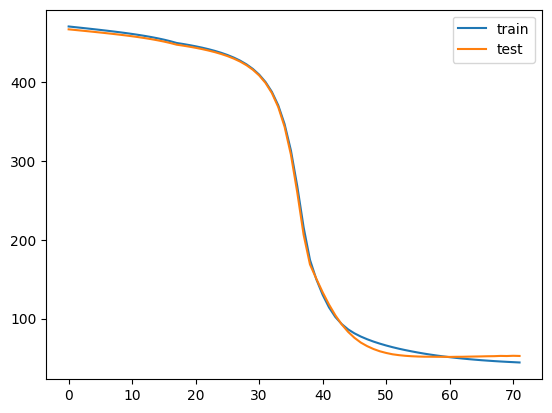

In [80]:
rates = (np.array([0.005, 0.004, 0.003, 0.002, 0.001]), np.array([0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 72
train_loss = []
test_loss = []

for i in range(int(rounds / 4)):
    network.train(train_input, train_salary, 2 * rates[0], 2 * rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

for i in range(3 * int(rounds / 4)):
    network.train(train_input, train_salary, rates[0], rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

print("training loss", train_loss[-1][0])
print("testing loss", test_loss[-1][0])

plt.plot(range(rounds), train_loss, label="train")
plt.plot(range(rounds), test_loss, label="test")
plt.legend()

Showing predictions for testing dataset

In [81]:
predictions = network.predict(test_input)
print("Testing Data Set")
for i in range(len(predictions)):
    print(f"{test_names[i][0]}, {test_names[i][1]} ({round(predictions[i][0] - test_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {test_salary[i]}")

Testing Data Set
Killian Hayes, Pistons (0.4):
	 predicted salary: 7.8, actual salary: 7.4
Malik Beasley, Lakers (-10.3):
	 predicted salary: 6.2, actual salary: 16.5
Jamal Murray, Nuggets (-11.7):
	 predicted salary: 22.1, actual salary: 33.8
Jaden McDaniels, Twolves (3.9):
	 predicted salary: 7.8, actual salary: 3.9
Kentavious Caldwell-Pope, Nuggets (-2.1):
	 predicted salary: 12.6, actual salary: 14.7
Jevon Carter, Bucks (3.8):
	 predicted salary: 6.0, actual salary: 2.2
Jarred Vanderbilt, Lakers (1.8):
	 predicted salary: 6.5, actual salary: 4.7
Naz Reid, Twolves (5.1):
	 predicted salary: 7.0, actual salary: 1.9
Saddiq Bey, Pistons (1.9):
	 predicted salary: 6.4, actual salary: 4.5
Bojan Bogdanovic, Pistons (9.9):
	 predicted salary: 29.9, actual salary: 20.0
Grayson Allen, Bucks (0.5):
	 predicted salary: 9.0, actual salary: 8.5
Steph Curry, Warriors (-5.3):
	 predicted salary: 46.6, actual salary: 51.9
Klay Thompson, Warriors (-16.9):
	 predicted salary: 26.3, actual salary: 43.

Overfitting a small training set

training loss 1.161695223456511
Testing Data Set
Robert Williams, Celtics (0.3):
	 predicted salary: 12.1, actual salary: 11.8
Grant Williams, Celtics (-0.4):
	 predicted salary: 3.9, actual salary: 4.3
Khris Middleton, Bucks (-0.1):
	 predicted salary: 40.3, actual salary: 40.4
Rui Hachimura, Lakers (-0.4):
	 predicted salary: 5.9, actual salary: 6.3
Josh Hart, Knicks (-0.3):
	 predicted salary: 12.7, actual salary: 13.0
Cory Joseph, Pistons (-0.4):
	 predicted salary: 4.7, actual salary: 5.1
Al Horford, Celtics (0.9):
	 predicted salary: 10.9, actual salary: 10.0
Collin Sexton, Jazz (-0.5):
	 predicted salary: 16.8, actual salary: 17.3
Nikola Jokic, Nuggets (0.5):
	 predicted salary: 47.4, actual salary: 46.9
Derrick White, Celtics (-0.8):
	 predicted salary: 17.3, actual salary: 18.1
Draymond Green, Warriors (0.1):
	 predicted salary: 27.7, actual salary: 27.6
Jonathan Kuminga, Warriors (0.6):
	 predicted salary: 6.6, actual salary: 6.0
Dennis Schroeder, Lakers (3.7):
	 predicted sa

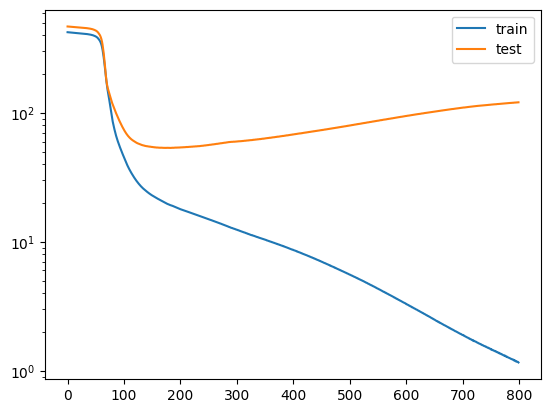

In [85]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=5, layer_sizes=[30, 30, 30, 30, 30])
rates = (np.array([0.02, 0.01, 0.07, 0.004, 0.002, 0.001]), np.array([0.002, 0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 8
eras = 10
train_small_loss = []
test_loss = []
num = 20
mult = 0.8

for i in range(eras):
    for j in range(rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= 0.80

for i in range(3 * eras):
    for j in range(3 * rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= .98

# mult *= 1.5


print("training loss", train_small_loss[-1][0])

plt.plot(range(len(train_small_loss)), train_small_loss, label="train")
plt.plot(range(len(test_loss)), test_loss, label="test")
plt.yscale("log")
plt.legend()

predictions = network.predict(train_input[0:num])
print("Testing Data Set")
for i in range(num):
    print(f"{train_names[i][0]}, {train_names[i][1]} ({round(predictions[i][0] - train_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {train_salary[i]}")